# Blatt 5

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.set_option("display.width", 2000)      # Breite des Outputs vergrößern
pd.set_option("display.max_columns", None)# zeigt alle Spalten vollständig
pd.set_option("display.max_rows", None)   # (optional) zeigt alle Zeilen

## Nr.1
### a)
### Datensatz

In [103]:
df = pd.read_csv("Input/herford_weather.csv")

df['date'] = pd.to_datetime(df['time'])

df = df.set_index('date')
df.iloc[:5, :5]


,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C)
date,,,,,
1996-01-01 00:00:00,1996-01-01T00:00,-2.3,80,-5.3,-7.2
1996-01-01 01:00:00,1996-01-01T01:00,-2.1,80,-5.2,-7.0
1996-01-01 02:00:00,1996-01-01T02:00,-2.0,79,-5.2,-6.9
1996-01-01 03:00:00,1996-01-01T03:00,-2.1,79,-5.3,-7.0
1996-01-01 04:00:00,1996-01-01T04:00,-2.2,78,-5.5,-7.1


### Diagramm

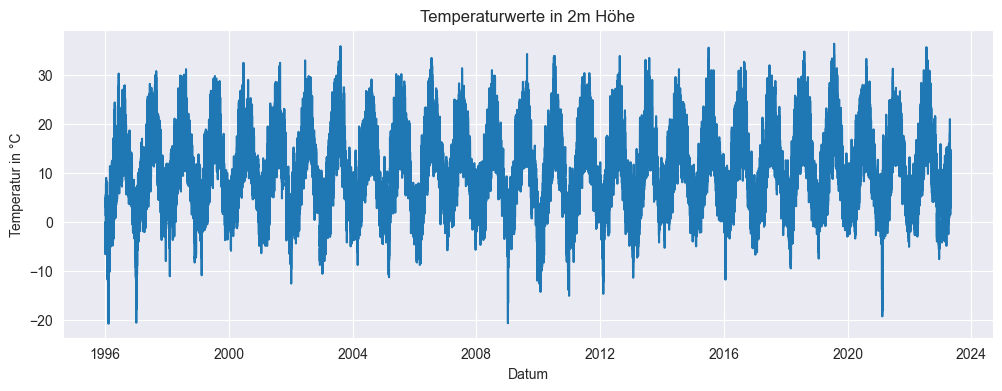

In [104]:
plt.figure(figsize=(12,4))
plt.plot(df['temperature_2m (°C)'])
plt.title("Temperaturwerte in 2m Höhe")
plt.xlabel("Datum")
plt.ylabel("Temperatur in °C")
plt.show()

In [105]:
df_2022 = df.loc['2022']
temp_col = 'temperature_2m (°C)'
temp_label = 'Temperatur 2m (°C)'
daily_mean_2022 = df_2022[temp_col].resample('D').mean()
daily_mean_2022 = daily_mean_2022.to_frame(name=temp_label)

daily_mean_2022.head()

,Temperatur 2m (°C)
date,
2022-01-01,11.295833
2022-01-02,11.058333
2022-01-03,8.708333
2022-01-04,6.445833
2022-01-05,2.695833


### b)
### Stündliche Werte

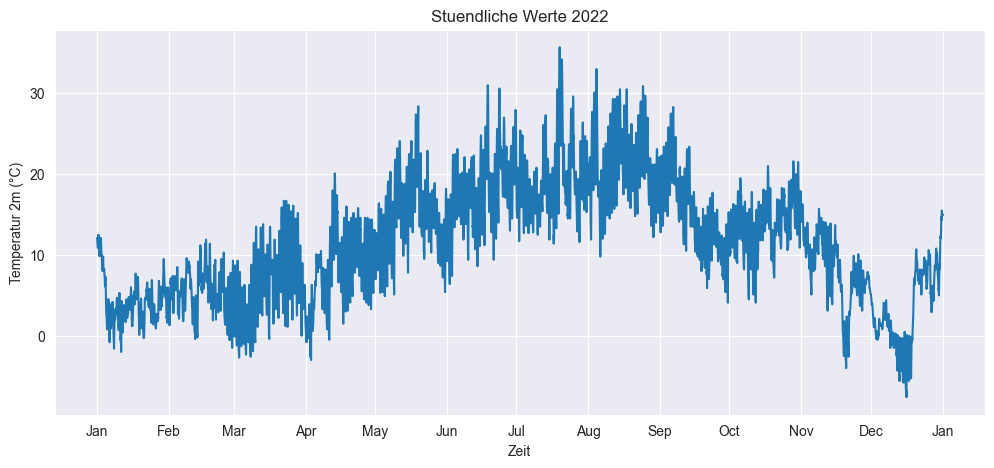

In [106]:
plt.figure(figsize=(12,5))
plt.plot(df_2022.index, df_2022[temp_col], color='tab:blue')
plt.title('Stuendliche Werte 2022')
plt.xlabel('Zeit')
plt.ylabel(temp_label)

# Monatstick erzwingen
month_locator = mdates.MonthLocator(interval=1)
month_formatter = mdates.DateFormatter('%b')

ax = plt.gca()
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(month_formatter)


plt.show()


### Tägliche Werte

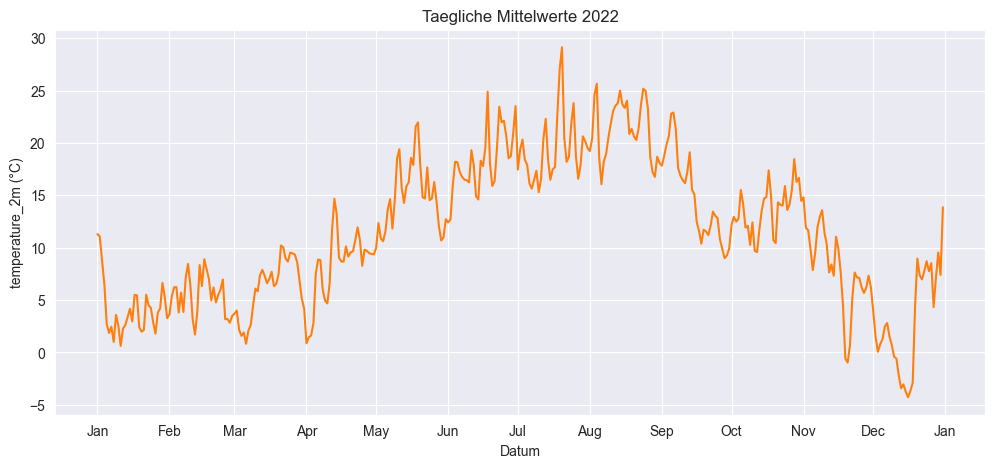

In [107]:
# PLOT 2: Taegliche Mittelwerte
plt.figure(figsize=(12,5))
plt.plot(daily_mean_2022.index, daily_mean_2022[temp_label], color='tab:orange')
plt.title('Taegliche Mittelwerte 2022')
plt.xlabel('Datum')
plt.ylabel(temp_col)

# Jeder Monat als Tick
month_locator = mdates.MonthLocator(interval=1)
month_formatter = mdates.DateFormatter('%b')

ax = plt.gca()
ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(month_formatter)

plt.show()


## Nr.2
### a)

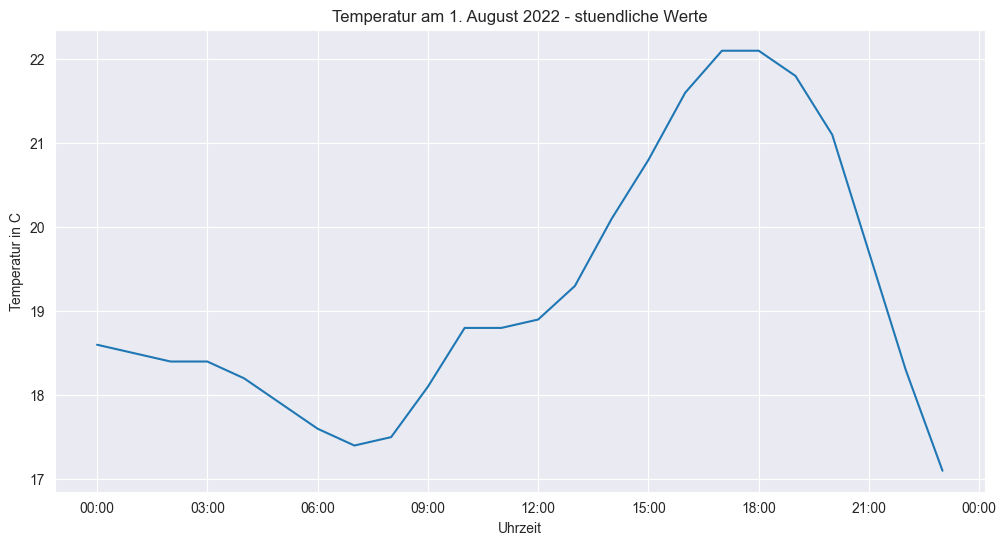

In [108]:
# Werte am 1. August 2022 (stuendlich)
df_aug1 = df.loc["2022-08-01", temp_col]


# Plot
plt.figure(figsize=(12,6))
plt.plot(df_aug1.index, df_aug1.values,)
plt.title("Temperatur am 1. August 2022 - stuendliche Werte")
plt.xlabel("Uhrzeit")
plt.ylabel("Temperatur in C")


# Nur Uhrzeit anzeigen
time_formatter = mdates.DateFormatter("%H:%M")
plt.gca().xaxis.set_major_formatter(time_formatter)

# Ticks alle 3 Stunden
locator = mdates.HourLocator(interval=3)
plt.gca().xaxis.set_major_locator(locator)

plt.show()


### b)

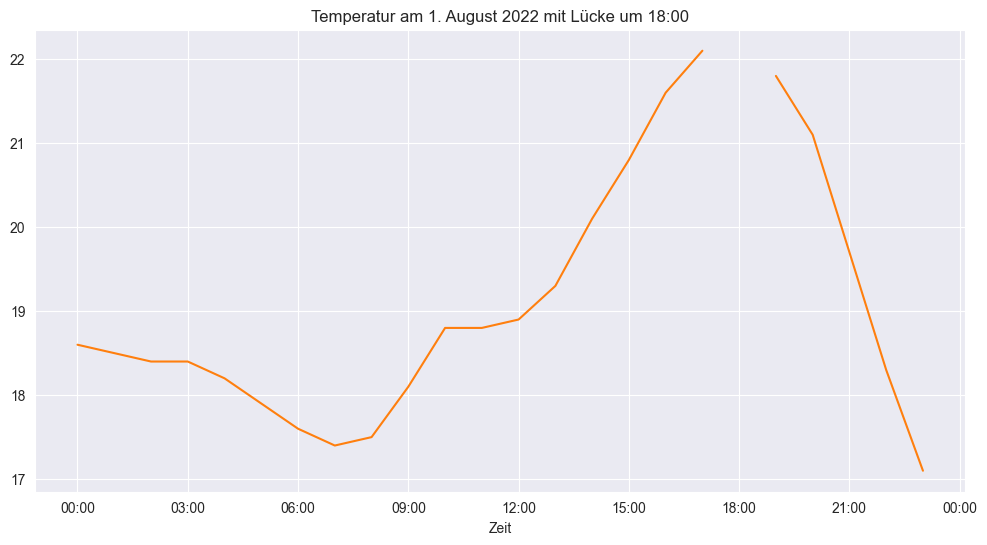

In [109]:
aug1_missing = df_aug1.copy()
missing_ts = pd.Timestamp('2022-08-01 18:00:00')
if missing_ts in aug1_missing.index:
    aug1_missing.loc[missing_ts] = np.nan

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(aug1_missing.index, aug1_missing, color='tab:orange')
ax.set_title('Temperatur am 1. August 2022 mit Lücke um 18:00')
ax.set_xlabel('Zeit')

# Nur Uhrzeit anzeigen

plt.gca().xaxis.set_major_formatter(time_formatter)

plt.gca().xaxis.set_major_locator(locator)

plt.show()

### c)

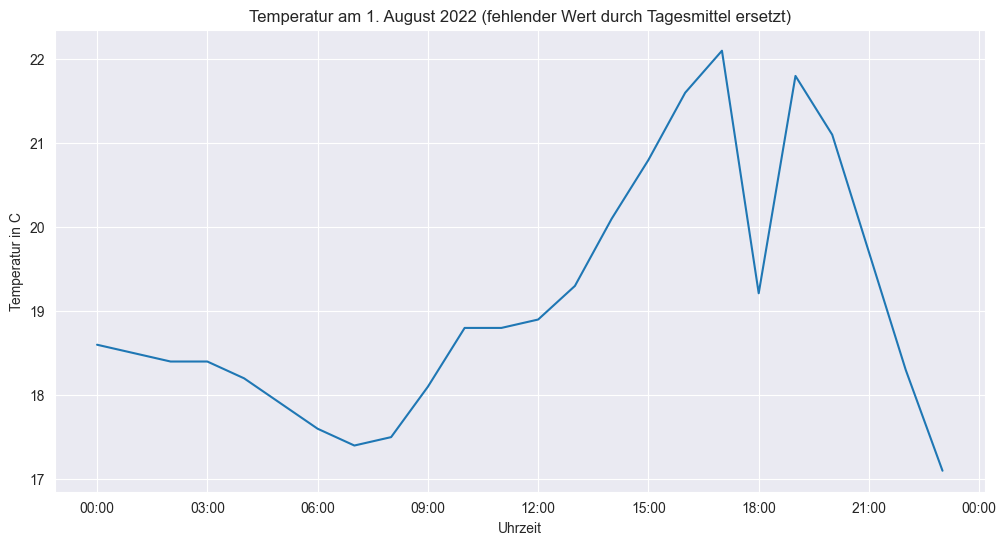

In [110]:
global_mean = df_aug1.mean()

# 3) Den fehlenden Wert für 18:00 Uhr ersetzen
df_aug1_filled = df_aug1.copy()
df_aug1_filled.loc["2022-08-01 18:00:00"] = global_mean

# 4) Plot mit gefuelltem Wert
plt.figure(figsize=(12,6))
plt.plot(df_aug1_filled.index, df_aug1_filled.values)
plt.title("Temperatur am 1. August 2022 (fehlender Wert durch Tagesmittel ersetzt)")
plt.xlabel("Uhrzeit")
plt.ylabel("Temperatur in C")

# Nur Uhrzeit anzeigen
plt.gca().xaxis.set_major_formatter(time_formatter)
plt.gca().xaxis.set_major_locator(locator)

plt.show()

### d)

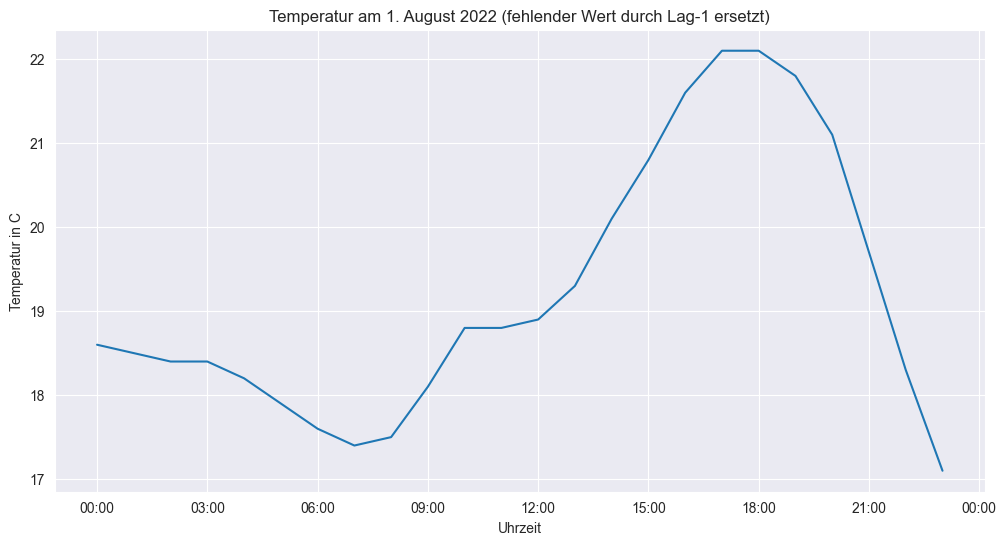

In [111]:
# Lag-1 Wert bestimmen (17:00 Uhr)
lag_value = df_aug1.loc["2022-08-01 17:00:00"]

# Fehlenden Wert um 18:00 Uhr mit Lag-1 fuellen
df_aug1_lag = df_aug1.copy()
df_aug1_lag.loc["2022-08-01 18:00:00"] = lag_value

# Plot mit Lag-1 Ersatzwert
plt.figure(figsize=(12,6))
plt.plot(df_aug1_lag.index, df_aug1_lag.values)
plt.title("Temperatur am 1. August 2022 (fehlender Wert durch Lag-1 ersetzt)")
plt.xlabel("Uhrzeit")
plt.ylabel("Temperatur in C")
plt.gca().xaxis.set_major_formatter(time_formatter)


plt.gca().xaxis.set_major_locator(locator)

plt.show()

## Nr.3

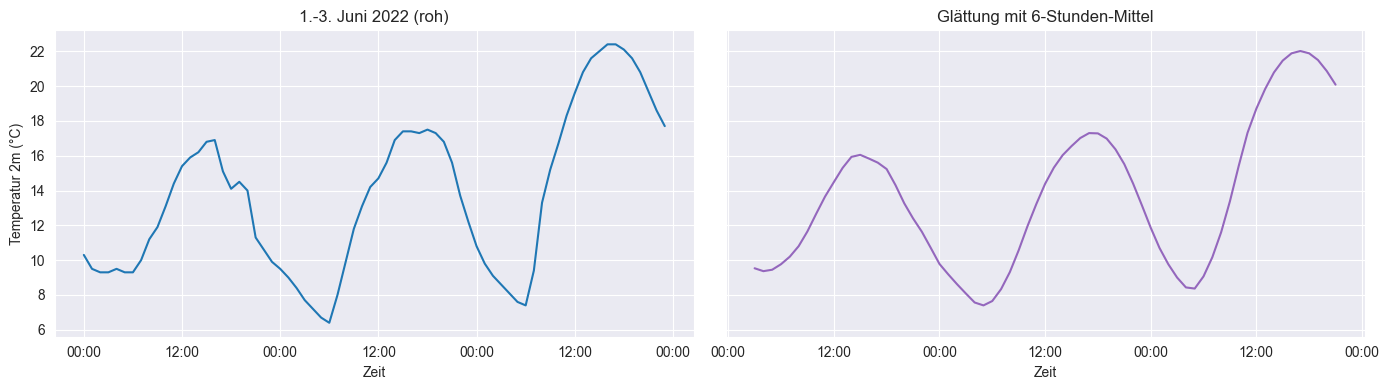

In [120]:
twelve_hour_locator = mdates.HourLocator(byhour=[0, 12])

june_slice = df.loc['2022-06-01':'2022-06-03', temp_col]
rolling_window = 6
june_smoothed = june_slice.rolling(window=rolling_window, center=True).mean()

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

axes[0].plot(june_slice.index, june_slice, color='tab:blue')
axes[0].set_title('1.-3. Juni 2022 (roh)')
axes[0].set_xlabel('Zeit')
axes[0].set_ylabel(temp_label)

axes[0].xaxis.set_major_formatter(time_formatter)   # wiederverwendet
axes[0].xaxis.set_major_locator(twelve_hour_locator)

axes[1].plot(june_smoothed.index, june_smoothed, color='tab:purple')
axes[1].set_title(f'Glättung mit {rolling_window}-Stunden-Mittel')
axes[1].set_xlabel('Zeit')

axes[1].xaxis.set_major_formatter(time_formatter)   # wiederverwendet
axes[1].xaxis.set_major_locator(twelve_hour_locator)


plt.tight_layout()